In [1]:
from tdw.controller import Controller
from tdw.tdw_utils import TDWUtils
from tdw.add_ons.third_person_camera import ThirdPersonCamera
from typing import Dict
from tdw.add_ons.collision_manager import CollisionManager
from tdw.add_ons.object_manager import ObjectManager

# Added for video
from tdw.add_ons.image_capture import ImageCapture
from tdw.backend.paths import EXAMPLE_CONTROLLER_OUTPUT_PATH
from os import chdir, system
from subprocess import call
import shutil

# Added for collisions
import random
import numpy as np

# From &tdw_physics
from typing import List, Dict
from tdw.librarian import ModelLibrarian
from typing import Dict
from controllers.helpers.helpers import ObjectInfo, get_random_avatar_position
from controllers.helpers.objects import *

In [137]:
''' Do not remove '''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
lib = ModelLibrarian('models_core.json')
# Concatenate the ALL lists
objects = CONTAINERS + CONTAINED + OCCLUDERS + OCCLUDERS_SEE_THROUGH + OCCLUDED +\
                ROLLING_FLIPPED + BALLS

# Remove duplicates, while preserving order
# See https://stackoverflow.com/questions/480214/how-do-i-remove-duplicates-from-a-list-while-preserving-order
objects = list(dict.fromkeys(objects))
print(len(objects))
df = pd.DataFrame(
{'names': [record.name for record in lib.records if record.name in objects],
    'scales' :[TDWUtils.get_unit_scale(record) for record in lib.records if record.name in objects],
'volume' : [np.prod(TDWUtils.get_bounds_extents(record.bounds)) for record in lib.records if record.name in objects],}
)
df = df.sort_values(by="volume", ignore_index=True)
df

97


,names,scales,volume
0,aaa_battery,20.216037,0.000005
1,chocolate_bar001,19.654760,0.000008
2,b03_pen_01_001,9.177869,0.000012
3,b03_pen,6.405872,0.000018
4,9v_battery,19.053041,0.000025
...,...,...,...
92,699264_shoppingcart_2013,1.004450,0.667224
93,b03_shopping_cart_walmart,0.845367,0.784615
94,b03_ka90ivi20r_2013__vray,0.565877,1.109487
95,balance_double_doghouse,0.845467,1.116060


15.000049465689893 56.723865354645326


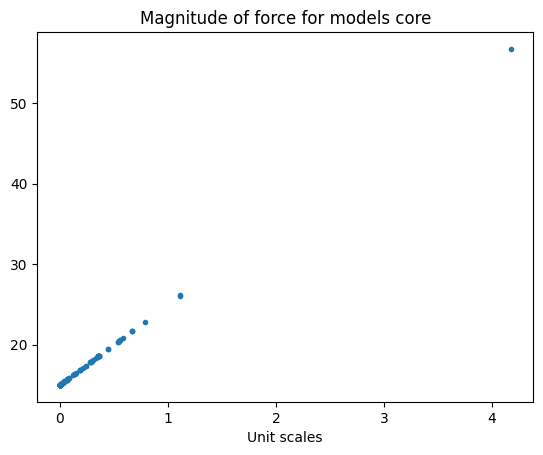

In [214]:
i, j = 0, 97
magnitude = df['volume'][i:j]*10+15
print(np.min(magnitude), np.max(magnitude))
plt.plot(df['volume'][i:j], magnitude,'.', label='unit_scale')

plt.title('Magnitude of force for models core')
plt.xlabel('Unit scales')
plt.show()

14.567926691799244 53.90663082329455


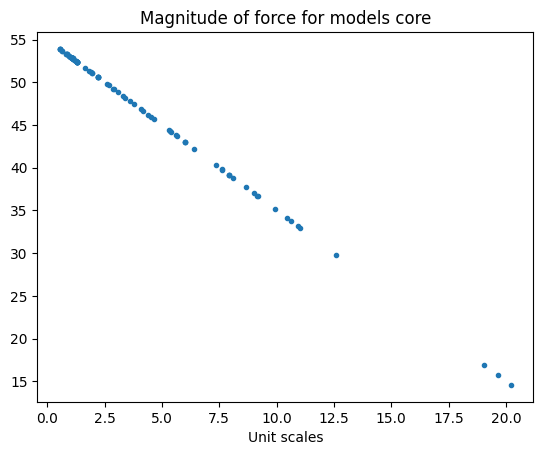

In [221]:
i, j = 0, 97
magnitude = -df['scales'][i:j]*2+55
print(np.min(magnitude), np.max(magnitude))

plt.plot(df['scales'][i:j], magnitude,'.', label='unit_scale')

plt.title('Magnitude of force for models core')
plt.xlabel('Unit scales')
plt.show()

Lowest magnitude is 9.783988078744567 and highest is 50.30601623934612
Lowest magnitude is 14.783988078744567 and highest is 55.30601623934612
Lowest magnitude is 4.783988078744567 and highest is 45.30601623934612


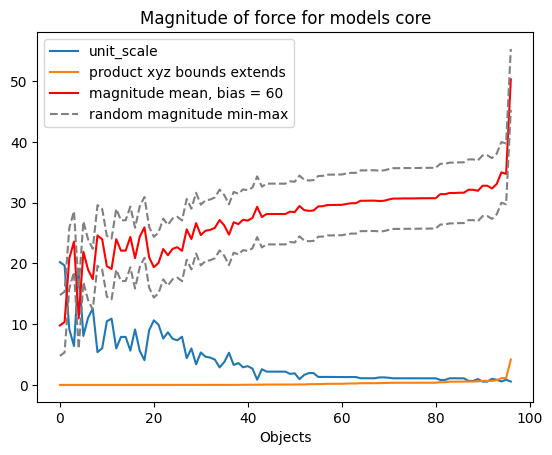

In [231]:
i, j = 0, 97

plt.plot(range(i, j) , df['scales'][i:j], label='unit_scale')
plt.plot(range(i, j) , df['volume'][i:j], label='product xyz bounds extends')
magnitude = (-df['scales'][i:j]*2+55)/2+(df['volume'][i:j]*10+15)/2 - 5
# magnitude = ((-(np.array(df['scales'][i:j]))*a + np.array(df['volume'][i:j])*b)+ bias)*2
print(f'Lowest magnitude is {np.min(magnitude)} and highest is {np.max(magnitude)}')
plt.plot(range(i, j) ,magnitude, color='red', linestyle='-', label=f'magnitude mean, bias = {60}')

magnitude = ((-df['scales'][i:j]*2+55)+(df['volume'][i:j]*10+15))/2 
# magnitude = ((-(np.array(df['scales'][i:j]))*a + np.array(df['volume'][i:j])*b)+ bias)*2
print(f'Lowest magnitude is {np.min(magnitude)} and highest is {np.max(magnitude)}')
plt.plot(range(i, j) ,magnitude, color='gray', linestyle='dashed', label=f'random magnitude min-max')

magnitude = ((-df['scales'][i:j]*2+55)+(df['volume'][i:j]*10+15))/2 -10
# magnitude = ((-(np.array(df['scales'][i:j]))*a + np.array(df['volume'][i:j])*b)+ bias)*2
print(f'Lowest magnitude is {np.min(magnitude)} and highest is {np.max(magnitude)}')
plt.plot(range(i, j) ,magnitude, color='gray', linestyle='dashed')




plt.title('Magnitude of force for models core')
plt.legend()
plt.xlabel('Objects')
plt.show()

In [9]:
lib = ModelLibrarian('models_core.json')
records = {record.name:i for i, record in enumerate(lib.records)}
record = lib.records[293]

In [11]:
from tdw.tdw_utils import TDWUtils
print(record.bounds)


{'back': {'x': -1.490116e-08, 'y': 0.04704352, 'z': -0.04254311}, 'bottom': {'x': -1.490116e-08, 'y': 0, 'z': -3.72529e-09}, 'center': {'x': -1.490116e-08, 'y': 0.04704352, 'z': -3.72529e-09}, 'front': {'x': -1.490116e-08, 'y': 0.04704352, 'z': 0.0425431}, 'left': {'x': -0.05559815, 'y': 0.04704352, 'z': -3.72529e-09}, 'right': {'x': 0.05559812, 'y': 0.04704352, 'z': -3.72529e-09}, 'top': {'x': -1.490116e-08, 'y': 0.09408703, 'z': -3.72529e-09}}


In [49]:
o_position = [3,4,5]
{"x": random.uniform(o_position[0]-10, o_position[0]+10), 
                                                    "y": o_position[1], 
                                                    "z": random.uniform(o_position[2]-10, o_position[2]+10)},

({'x': -3.1357168585432498, 'y': 4, 'z': 4.0989153721882055},)

In [22]:
width_x, height_y, width_z = TDWUtils.get_b{"x": random.uniform(-10, 10), "y": 0, "z": random.uniform(-10, 10)},ounds_extents(record.bounds)

0.11119627


In [14]:
# Calculate height and width of occluder #TODO check this formula
height_occl = abs(record.bounds['top']['y'] - record.bounds['bottom']['y'])

#NOTE TODO Somehow width is often 0
width_occl = abs(record.bounds['left']['z'] - record.bounds['right']['z'])
print(width_occl)

0.0


In [8]:
OBJECTS = ["fanta_orange_can_12_fl_oz_vray",
               "hexagonal_toy",
               "b03_sphere_chocolate",
               "coca-cola_can_001",
               "b05_baseballnew_v03_12",
               "b06_green_new",
               "star_wood_block",
               "amphora_jar_vase",
               "b03_burger",
               "golf",
               "dice",
               "apple",
               "wine_bottle",
               "jug01",
               "b03_723329_croissant",
               "moet_chandon_bottle_vray",
               "b04_banana",
               "b04_orange_00",
               "orange",
               "vm_v2_015",
               "b03_dice",
               "bread_02",
               "bread_01"]
for record in lib.records:
    if record.name in OBJECTS:
        print('"'+record.name+ '"')

"amphora_jar_vase"
"apple"
"b03_burger"
"b04_banana"
"b04_orange_00"
"golf"
"hexagonal_toy"
"jug01"
"moet_chandon_bottle_vray"
"orange"
"star_wood_block"


In [13]:
print(lib.records[120].__dict__.keys())
lib.records[120].__dict__['bounds']

dict_keys(['name', 'urls', 'wnid', 'wcategory', 'scale_factor', 'do_not_use', 'do_not_use_reason', 'flex', 'substructure', 'bounds', 'canonical_rotation', 'physics_quality', 'asset_bundle_sizes', 'composite_object', 'volume', 'container_shapes', 'affordance_points'])


{'back': {'x': 1.490116e-07, 'y': 0.4671669, 'z': -0.2698637},
 'bottom': {'x': 1.490116e-07, 'y': -5.960464e-08, 'z': 0},
 'center': {'x': 1.490116e-07, 'y': 0.4671669, 'z': 0},
 'front': {'x': 1.490116e-07, 'y': 0.467167, 'z': 0.2698637},
 'left': {'x': -0.2926708, 'y': 0.4671669, 'z': 0},
 'right': {'x': 0.2926711, 'y': 0.4671669, 'z': 0},
 'top': {'x': 1.490116e-07, 'y': 0.9343339, 'z': 0}}

: 

In [ ]:
lib.records